# Statement
- In this i will check how to select the best components.
- we can select all those components those can explain the ratio of `90%`

# How to Select Best Components

# Import packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
df=pd.read_csv('train.csv')
df.head(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Saperate Feature and label

In [3]:
feature=df.drop(columns='label')
label=df['label']

# Train test split

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
x_train,x_test,y_train,y_test=train_test_split(feature,label,test_size=0.2,random_state=42)

In [6]:
x_train.shape

(33600, 784)

In [7]:
x_test.shape

(8400, 784)

# Scale them

In [8]:
scale=StandardScaler()
x_train_scale=scale.fit_transform(x_train)
x_test_scale=scale.transform(x_test)

In [9]:
x_train_scale

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Apply PCA

In [10]:
from sklearn.decomposition import PCA

In [30]:
pca=PCA(n_components=None)
x_train_trf=pca.fit_transform(x_train_scale)
x_test_trf=pca.transform(x_test_scale)

# Now Find the component those can explain the `90%` variance

In [31]:
pca.explained_variance_

array([4.06711120e+01, 2.91702340e+01, 2.67445962e+01, 2.08534479e+01,
       1.81489188e+01, 1.58529825e+01, 1.38710810e+01, 1.24805897e+01,
       1.10279424e+01, 1.00958253e+01, 9.63317821e+00, 8.62785945e+00,
       8.06303131e+00, 7.89511749e+00, 7.44167929e+00, 7.17032873e+00,
       6.73266373e+00, 6.62744023e+00, 6.41499161e+00, 6.25808269e+00,
       5.90495742e+00, 5.76521585e+00, 5.52084601e+00, 5.32003847e+00,
       5.18309925e+00, 4.93439597e+00, 4.90652171e+00, 4.71800493e+00,
       4.49824444e+00, 4.43140305e+00, 4.32604521e+00, 4.23491831e+00,
       4.10335015e+00, 4.06731180e+00, 4.02362178e+00, 3.84130473e+00,
       3.81886146e+00, 3.71316498e+00, 3.60918108e+00, 3.47303214e+00,
       3.42842989e+00, 3.38841159e+00, 3.29157511e+00, 3.22927379e+00,
       3.21745142e+00, 3.15810372e+00, 3.12620905e+00, 3.10412385e+00,
       3.05892795e+00, 3.03728188e+00, 2.96540461e+00, 2.94033669e+00,
       2.86828564e+00, 2.82617865e+00, 2.80038441e+00, 2.77411221e+00,
      

- **These are the ratio explain by each col.**
- **We can apply the `cummulative sum` and then select only those col whose can explain `90%` ratio.**

In [32]:
pca.explained_variance_ratio_

array([5.78519225e-02, 4.14926968e-02, 3.80423901e-02, 2.96626277e-02,
       2.58156168e-02, 2.25498018e-02, 1.97306802e-02, 1.77527998e-02,
       1.56865066e-02, 1.43606328e-02, 1.37025484e-02, 1.22725500e-02,
       1.14691200e-02, 1.12302739e-02, 1.05852885e-02, 1.01993106e-02,
       9.57676152e-03, 9.42708817e-03, 9.12489429e-03, 8.90170190e-03,
       8.39940495e-03, 8.20063196e-03, 7.85303229e-03, 7.56739707e-03,
       7.37261022e-03, 7.01884653e-03, 6.97919728e-03, 6.71104483e-03,
       6.39845030e-03, 6.30337291e-03, 6.15350848e-03, 6.02388659e-03,
       5.83673972e-03, 5.78547759e-03, 5.72333148e-03, 5.46399774e-03,
       5.43207369e-03, 5.28172755e-03, 5.13381744e-03, 4.94015474e-03,
       4.87671103e-03, 4.81978768e-03, 4.68204430e-03, 4.59342487e-03,
       4.57660834e-03, 4.49219022e-03, 4.44682221e-03, 4.41540749e-03,
       4.35111936e-03, 4.32032928e-03, 4.21808870e-03, 4.18243127e-03,
       4.07994349e-03, 4.02004913e-03, 3.98335855e-03, 3.94598812e-03,
      

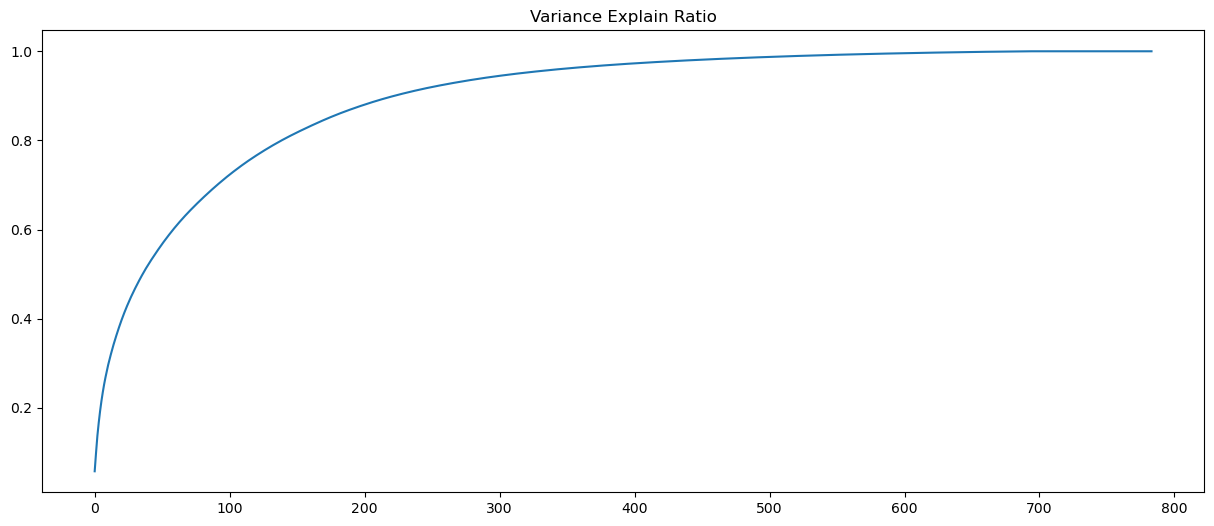

In [33]:
plt.figure(figsize=(15,6))
plt.title("Variance Explain Ratio")
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

# Now we can mark them where 90% ratio is explain

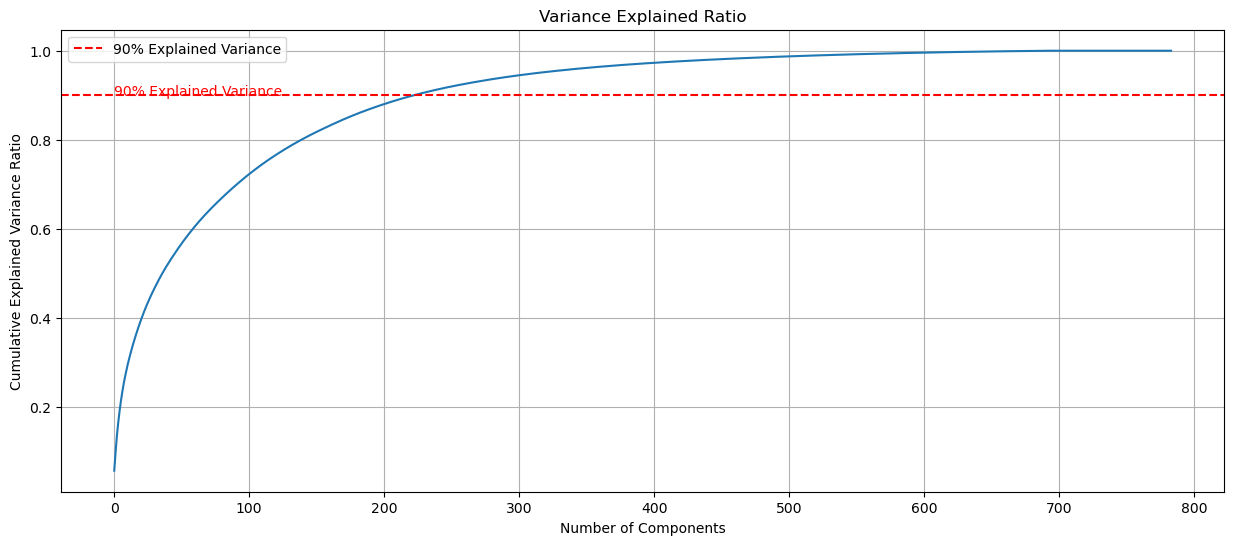

In [34]:
plt.figure(figsize=(15, 6))
plt.title("Variance Explained Ratio")
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# Mark the point where cumulative explained variance reaches 90%
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Explained Variance')
plt.text(0, 0.9, '90% Explained Variance', color='red', fontsize=10)

plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.legend()
plt.grid(True)
plt.show()

# Conclussion
- we can see we can explain  the `90%` ratio at `220 components`

# Train the model at 100 components

In [35]:
pca=PCA(n_components=220)
x_train_trf=pca.fit_transform(x_train_scale)
x_test_trf=pca.transform(x_test_scale)

# Fit the model

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
cls=KNeighborsClassifier()

In [38]:
cls.fit(x_train_trf,y_train)

KNeighborsClassifier()

In [39]:
pre=cls.predict(x_test_trf)

# Accuracy

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
accuracy_score(y_test,pre)

0.9492857142857143

# Conclussion
- **We see that at `220 components` we can get `94%` accuracy.**